In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns

import warnings 
from scipy import stats
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Concrete_Data.csv')

In [3]:
data.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.shape

(1030, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
data.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

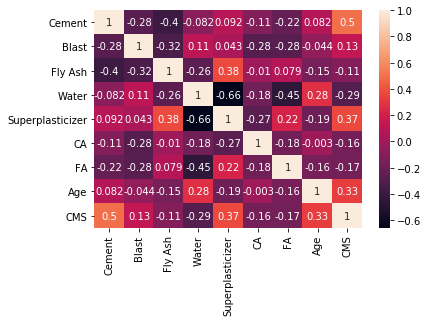

In [7]:
sns.heatmap(data.corr(), annot=True)

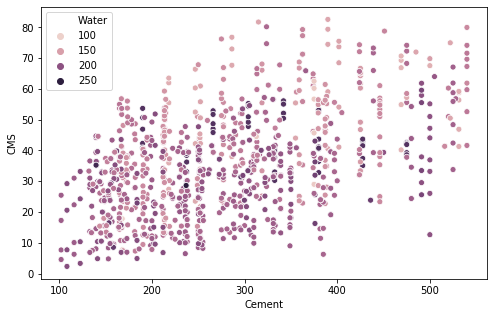

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Cement',y='CMS',hue='Water',data=data)

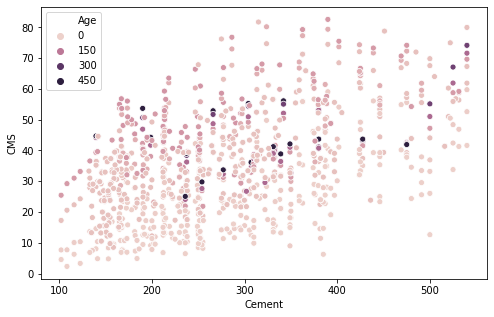

In [9]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Cement',y='CMS',hue='Age',data=data)

In [10]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)

(721, 8)
(309, 8)


In [12]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_lr)),mean_squared_error(Y_test, Y_pred_lr),
            mean_absolute_error(Y_test, Y_pred_lr), r2_score(Y_test, Y_pred_lr)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 9.68 		 93.62 		7.78 		0.64


Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 7.51 		 56.39 		4.80 		0.78


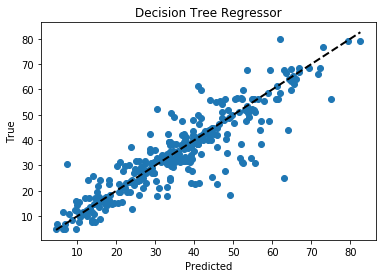

In [14]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, Y_train)

Y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_dtr)),mean_squared_error(Y_test, Y_pred_dtr),
            mean_absolute_error(Y_test, Y_pred_dtr), r2_score(Y_test, Y_pred_dtr)))

plt.scatter(Y_test, Y_pred_dtr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 5.26 		 27.68 		3.67 		0.89


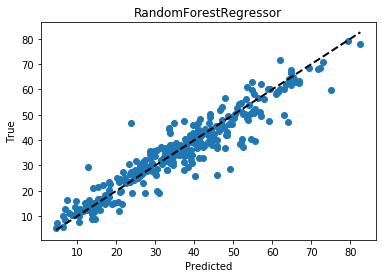

In [19]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, Y_train)

Y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(Y_test, Y_pred_rfr)),mean_squared_error(Y_test, Y_pred_rfr),
            mean_absolute_error(Y_test, Y_pred_rfr), r2_score(Y_test, Y_pred_rfr)))

plt.scatter(Y_test, Y_pred_rfr)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("RandomForestRegressor")
plt.show()

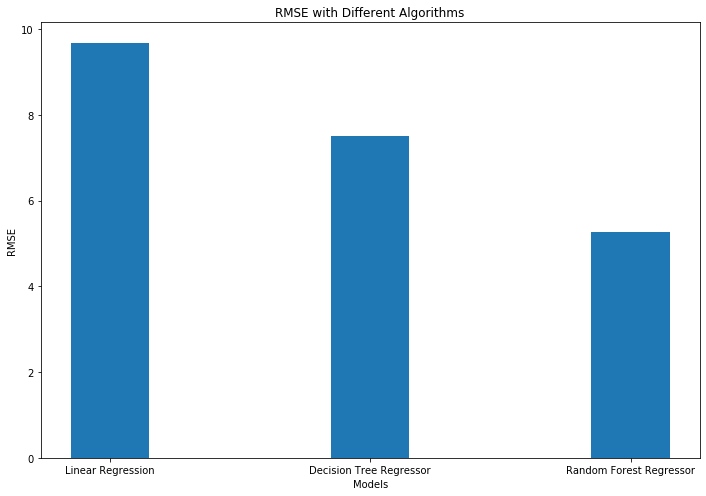

In [23]:
models = [lr,dtr, rfr]
names = ["Linear Regression",  "Decision Tree Regressor", "Random Forest Regressor"]
rmses = []

for model in models:
    rmses.append(np.sqrt(mean_squared_error(Y_test, model.predict(X_test))))

x = np.arange(len(names)) 
width = 0.3

fig, ax = plt.subplots(figsize=(10,7))
rects = ax.bar(x, rmses, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=0)
fig.tight_layout()
plt.show()

Random Forest Regressor has lowest RMSE value.

In [26]:
df=pd.DataFrame(Y_pred_rfr)
df.to_csv('Concrete Compressive Strength model.csv')